# Creating our own dataset from Google Images

In this tutorial we will see how to easily create an image dataset through Google Images. Note: We will have to repeat these steps for any new category we want to Google (e.g once for dogs and once for cats).

In [0]:
from fastai.vision import *

# Create directory and upload urls file into your server
Choosing an appropriate name for our labeled images. We can run these steps multiple times to create different labels.

In [0]:
!mkdir data

In [0]:
!mkdir data/bears

In [0]:
folder = 'black'
file = 'blk.txt'


In [0]:
folder = 'teddys'
file = 'ted.txt'

In [0]:
folder= 'brown'
file= 'brwnbears.txt'

In [0]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path = Path('data/bears')

# Download images
Now we will need to download our images from their respective urls.

fast.ai has a function that allows us to do just that. We just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice we can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

We will need to run this line once for every category.

In [0]:
download_images(path/file, dest, max_pics=200)

Error https://thumbs-prod.si-cdn.com/k5xRvaim8GT8sopNi4HxrrlIWZQ=/800x600/filters:no_upscale()/https://public-media.si-cdn.com/filer/20120612110029BearsBrownBearSMALL.jpg HTTPSConnectionPool(host='thumbs-prod.si-cdn.com', port=443): Read timed out. (read timeout=4)
Error https://thumbs-prod.si-cdn.com/M1-YNH4WbF1GeJ4z1jLmkosNlbE=/800x600/filters:no_upscale()/https://public-media.si-cdn.com/filer/1f/ed/1fed4057-edab-4a88-85c8-b626a2a1e0ac/43965680641_348d901fda_o.jpg HTTPSConnectionPool(host='thumbs-prod.si-cdn.com', port=443): Read timed out. (read timeout=4)
Error https://cdn-images-1.medium.com/max/1200/1*my6mRxT4cDFWKlD-uBwoTw.jpeg HTTPSConnectionPool(host='cdn-images-1.medium.com', port=443): Read timed out. (read timeout=4)
Error https://c402277.ssl.cf1.rackcdn.com/photos/1015/images/story_full_width/brown-bear-threatsHI_202779.jpg?1345583710 HTTPSConnectionPool(host='c402277.ssl.cf1.rackcdn.com', port=443): Read timed out. (read timeout=4)
Error https://img.washingtonpost.com/wp-

In [0]:
classes = ['teddys','brown','black']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys


cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000165.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000135.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000081.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000000.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000038.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000133.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000141.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000013.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000053.png'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000183.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000033.jpeg'>
cannot identify image file <_io.BufferedReader name='

cannot identify image file <_io.BufferedReader name='data/bears/brown/00000107.png'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000034.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000075.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000145.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000021.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000160.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000060.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000058.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000162.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000070.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000082.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/b

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:938: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/bears/black/00000085.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000012.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000025.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000079.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000189.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000124.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000035.png'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000021.png'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000107.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000158.jpg'>


# View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

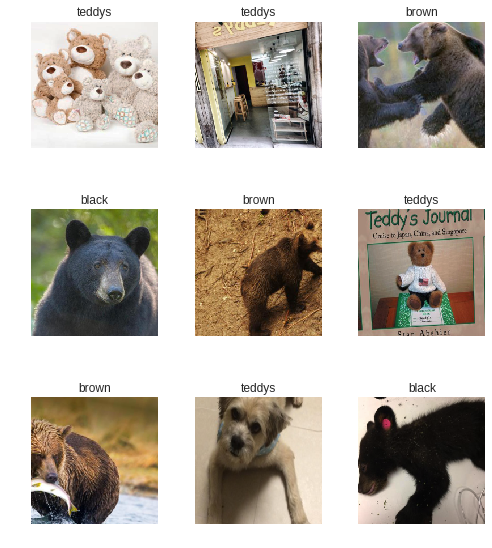

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'brown', 'teddys'], 3, 432, 107)

# Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 85192228.44it/s]


In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.211379,0.321378,0.065421,00:11
1,0.696171,0.063711,0.037383,00:09
2,0.497876,0.047848,0.018692,00:09
3,0.382244,0.042945,0.009346,00:09
4,0.303821,0.041756,0.009346,00:09


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


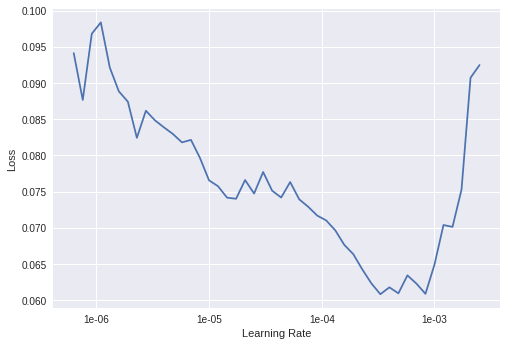

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.110778,0.031530,0.009346,00:08
1,0.076566,0.031326,0.009346,00:10


In [0]:
learn.save('stage-2')

# Interpretation

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (432 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
brown,brown,brown,brown,brown
Path: data/bears;

Valid: LabelList (107 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddys,brown,black,brown,teddys
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

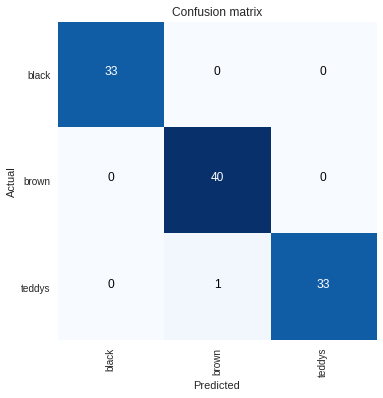

In [0]:
interp.plot_confusion_matrix()

# Putting your model in production
First thing first, let's export the content of our Learner object for production:

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

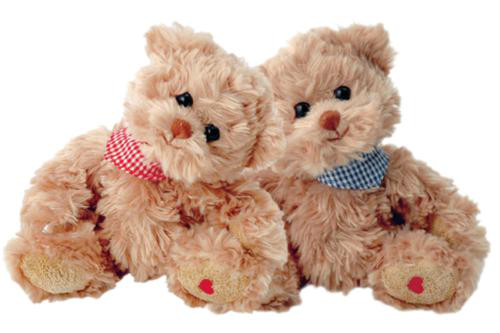

In [0]:
img = open_image(path/'teddys'/'00000011.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category teddys